In [18]:
import pickle
import pandas

In [17]:
pickle_off = open("/Users/kentarohoffman/github/iic_causal_inference/aim1/simulator_using_At-1/results/results_cauchy_expit_ARMA16_iter1000.pickle","rb")
Data = pickle.load(pickle_off)


In [20]:
C =  pd.read_csv('/Users/kentarohoffman/Dropbox/step1_output/covariates.csv')
Y =  pd.read_csv('/Users/kentarohoffman/Dropbox/step1_output/outcomes.csv')

,Index,Gender,Age,marrital,APACHE II first 24,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
0,sid36,0,73.84,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,9,0,4,1,4,3,1,9,0,0
1,sid39,0,70.77,0.0,NaN,1.0,1.0,1.0,0.0,0.0,...,9,0,4,1,4,9,0,9,1,0
2,sid56,1,82.84,0.0,NaN,1.0,0.0,1.0,0.0,0.0,...,12,0,4,3,5,3,1,12,1,0
3,sid297,0,58.95,1.0,NaN,1.0,1.0,1.0,0.0,1.0,...,15,0,4,5,6,15,0,15,0,0
4,sid327,0,45.47,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,7,1,1,1,5,7,1,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,sid1101,1,65.29,1.0,NaN,0.0,1.0,0.0,0.0,0.0,...,15,0,4,5,6,14,0,15,1,0
126,sid1102,1,63.97,1.0,NaN,1.0,1.0,0.0,0.0,1.0,...,15,0,4,5,6,15,0,15,1,1
127,sid1105,1,68.28,1.0,NaN,1.0,1.0,0.0,0.0,0.0,...,15,0,4,5,6,15,0,15,0,0
128,sid1113,0,72.38,0.0,NaN,1.0,1.0,0.0,0.0,1.0,...,3,1,1,1,1,3,1,3,0,0


In [21]:
#Sahar's Covariates
#<10 percent vs #>50 percent

In [23]:
Data.keys()

dict_keys(['Psim', 'Pobs', 'Pname', 'Dscaled', 'Dmax', 'Dname', 'C', 'Cname', 'spec', 'freq', 'cluster', 'sids'])

In [26]:
len(Data['Pobs'])

72

In [30]:
len(Data['Pobs'][1])

178

In [39]:
len(Data['Psim'])

72

In [41]:
len(Data['Psim'][1])

500

In [42]:
len(Data['Psim'][1][1])

178

In [43]:
n_patients = len(Data['Pobs'])
n_sim = len(Data['Psim'][1])

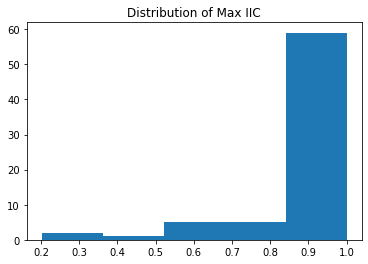

In [69]:
true_obs = np.empty(n_patients)
for i in range(0, n_patients):
    true_obs[i] = max(Data['Pobs'][i])
    
plt.hist(true_obs, bins = 5)
plt.title('Distribution of Max IIC')
plt.show()

In [80]:
print(Data['Psim'][i])
np.percentile(Data['Psim'][i][j], 0)

[[1.         1.         0.99666667 ... 0.99666667 1.         0.99666667]
 [1.         1.         1.         ... 0.99666667 1.         0.        ]
 [1.         1.         1.         ... 1.         1.         0.53666667]
 ...
 [1.         1.         1.         ... 1.         1.         0.98      ]
 [1.         1.         1.         ... 0.         0.99       0.98666667]
 [1.         1.         1.         ... 1.         0.99666667 0.99      ]]


0.25

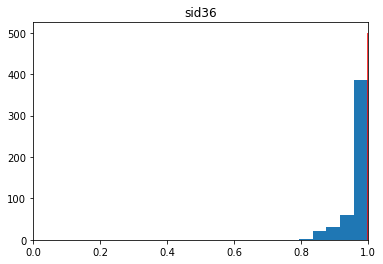

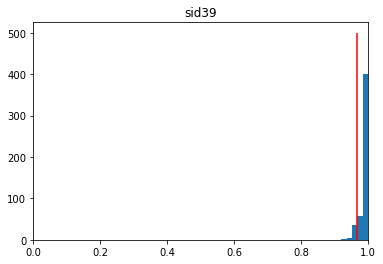

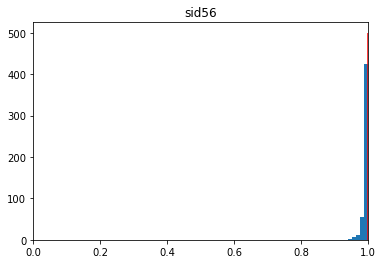

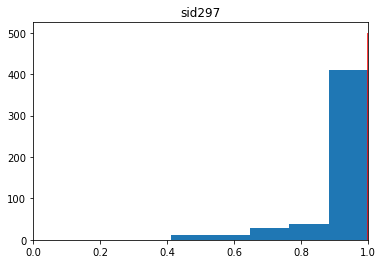

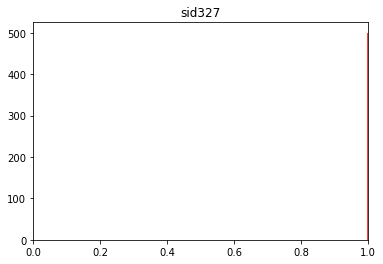

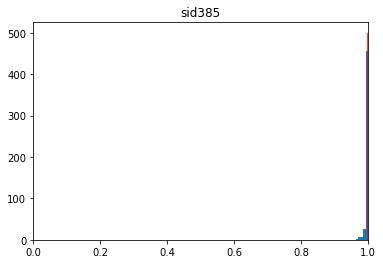

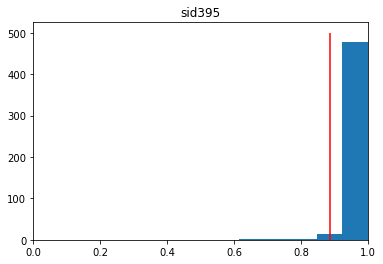

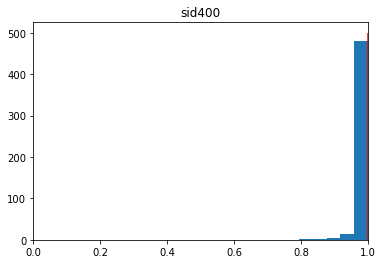

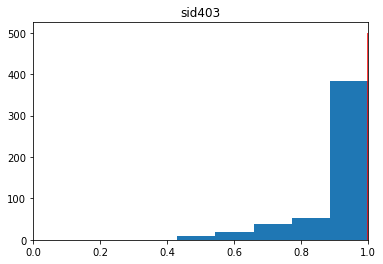

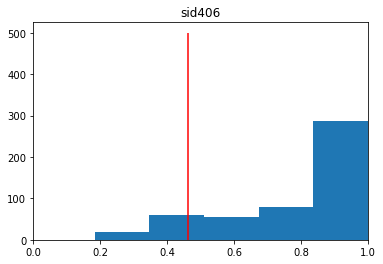

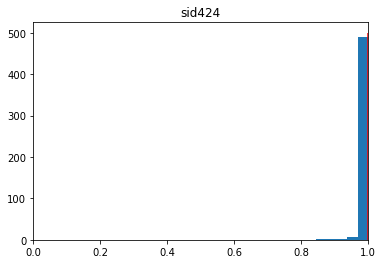

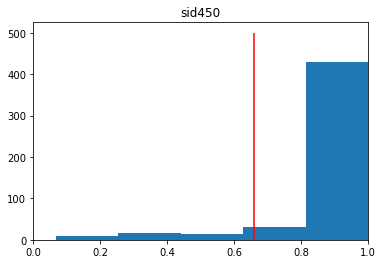

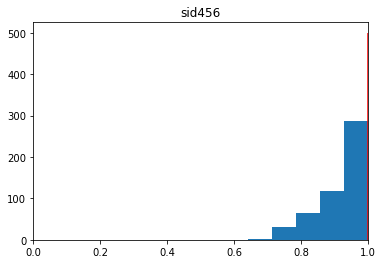

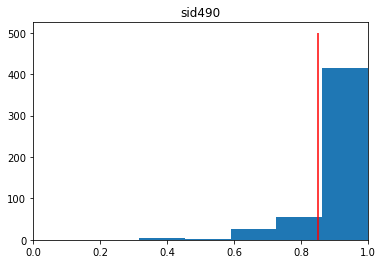

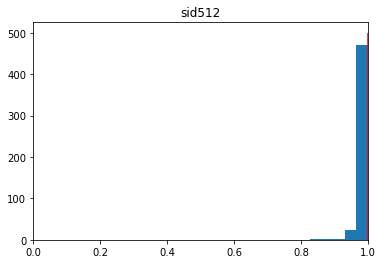

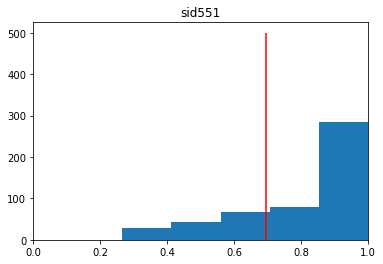

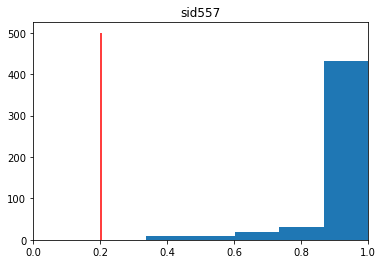

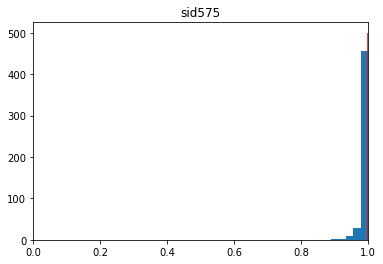

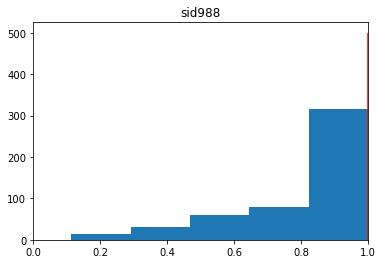

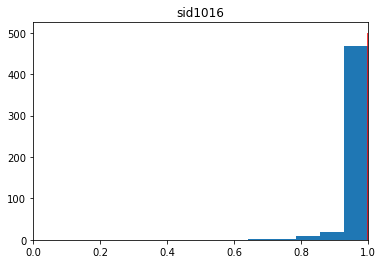

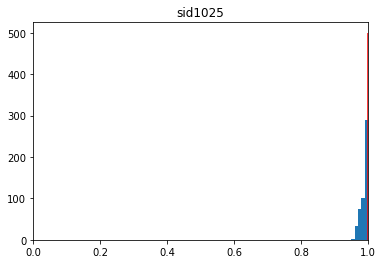

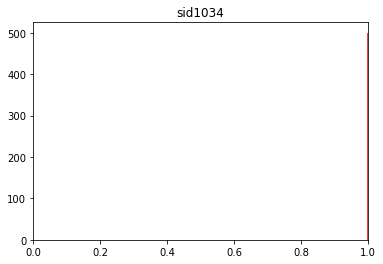

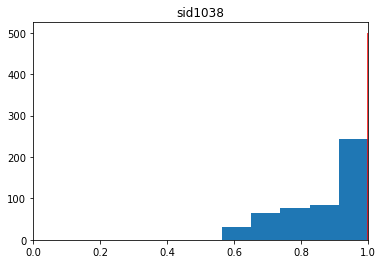

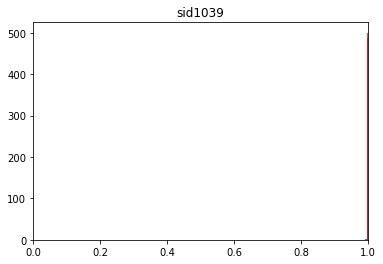

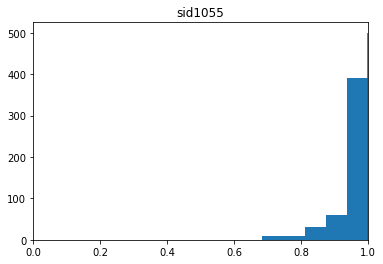

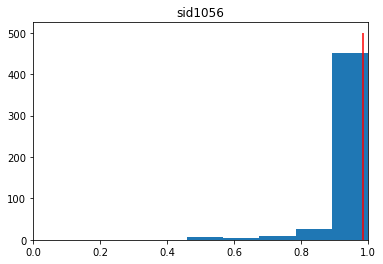

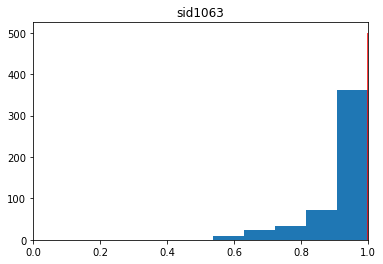

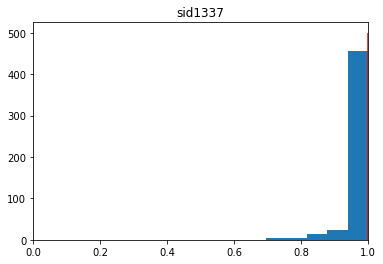

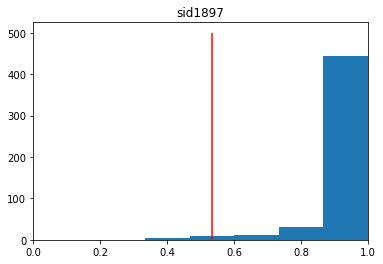

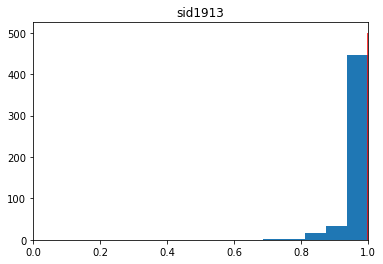

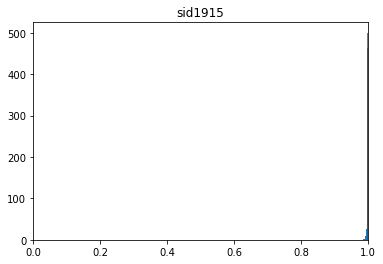

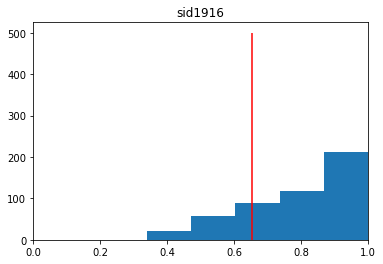

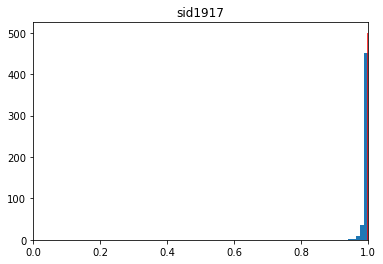

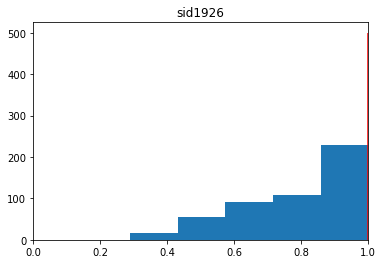

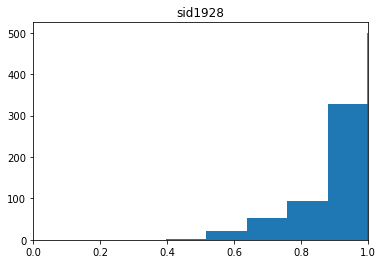

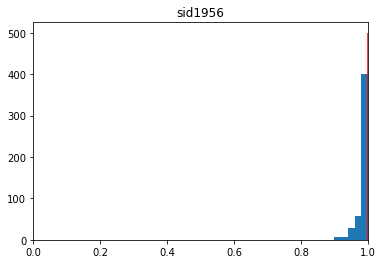

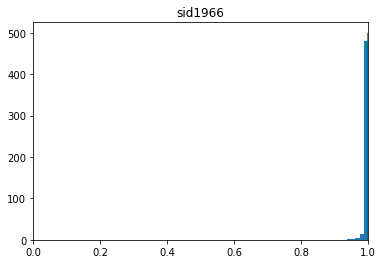

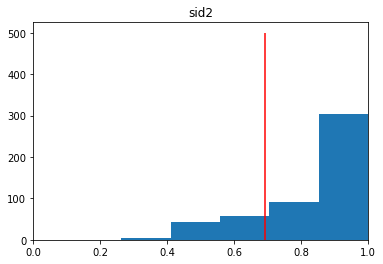

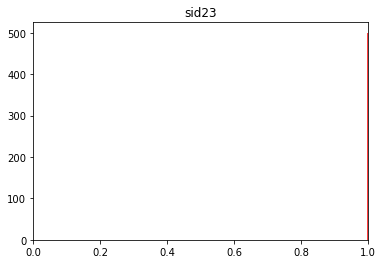

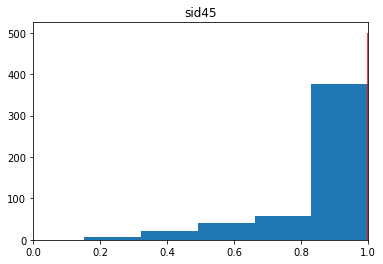

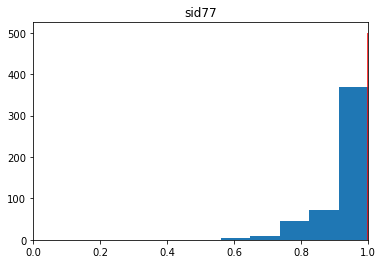

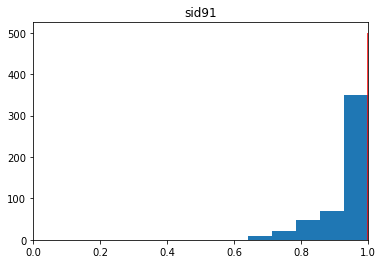

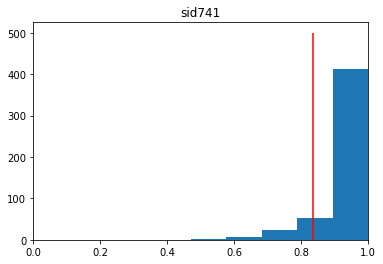

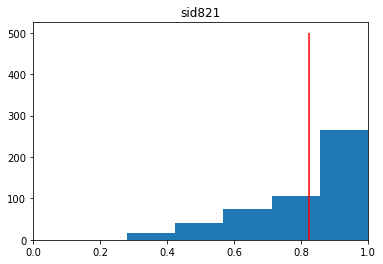

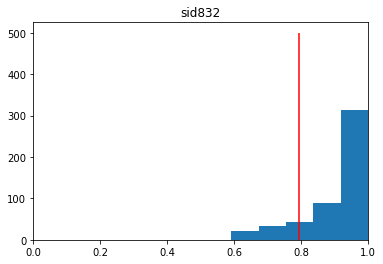

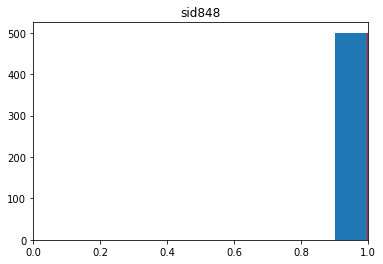

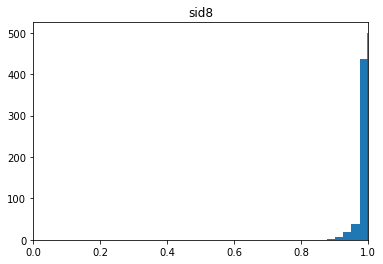

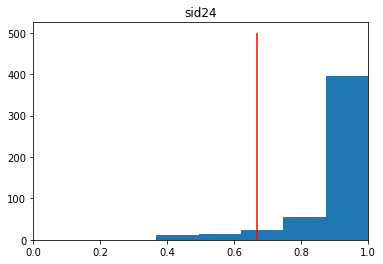

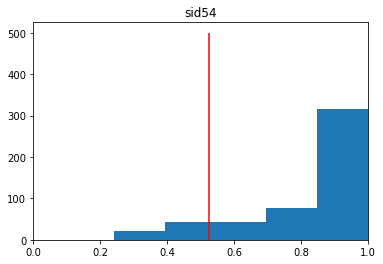

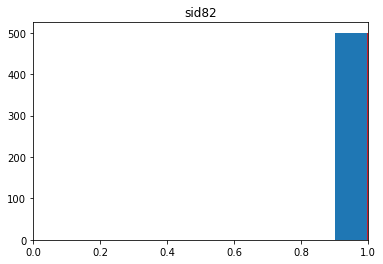

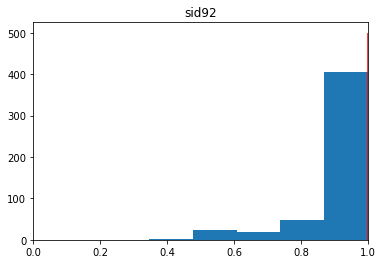

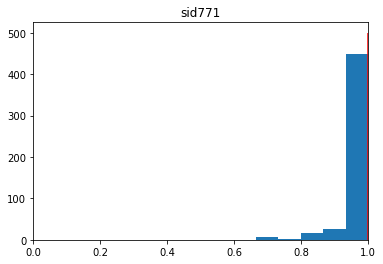

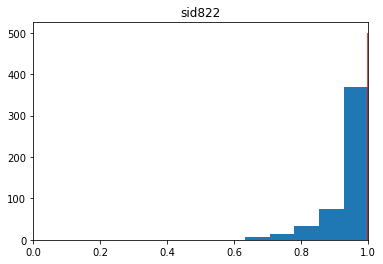

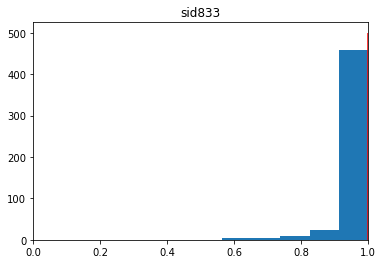

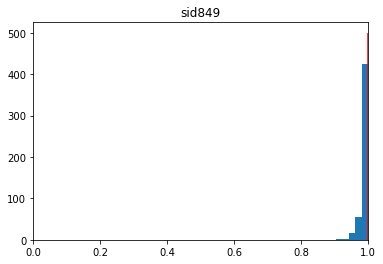

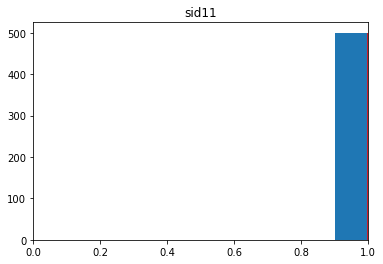

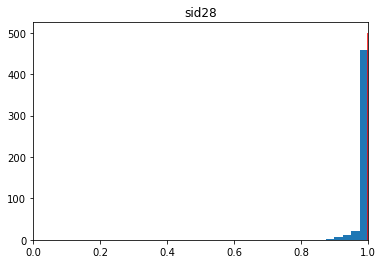

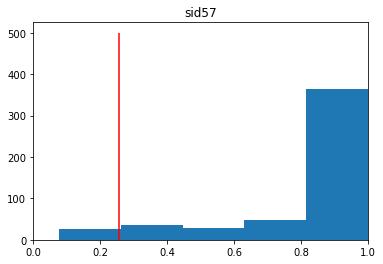

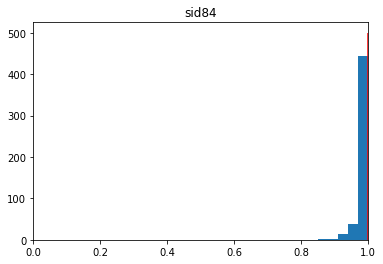

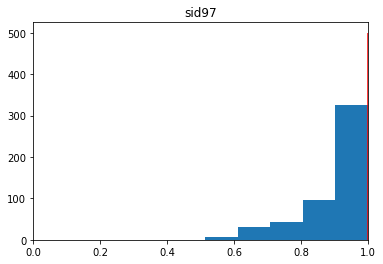

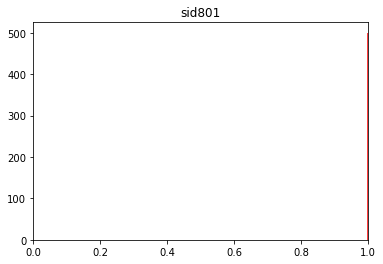

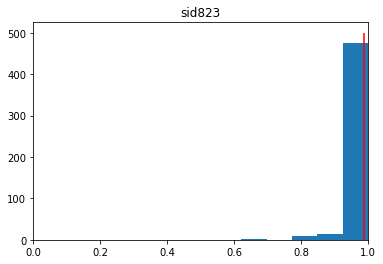

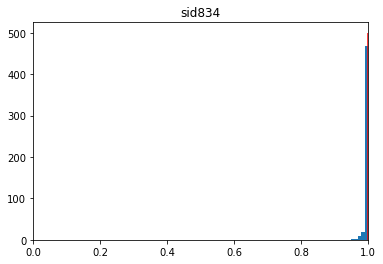

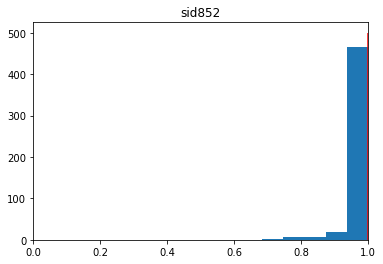

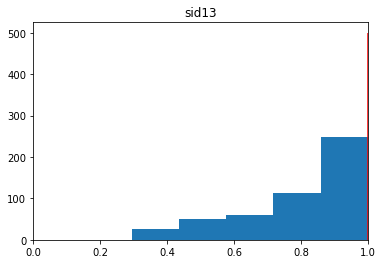

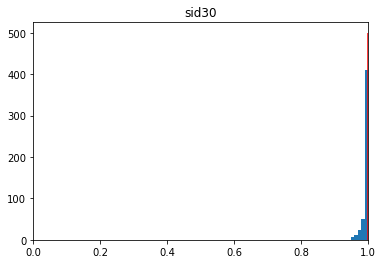

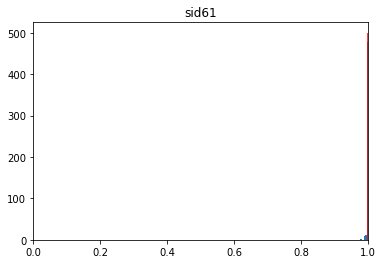

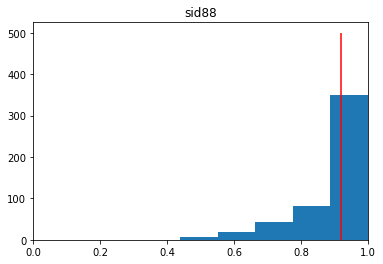

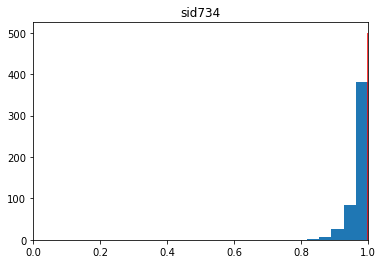

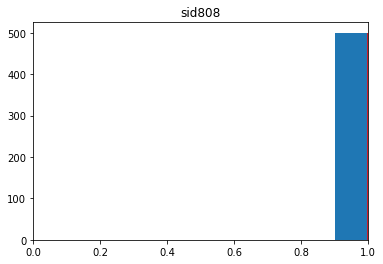

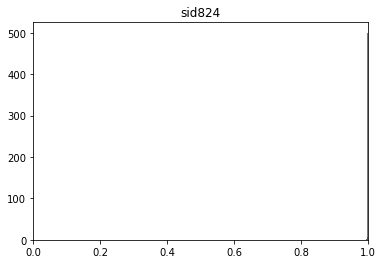

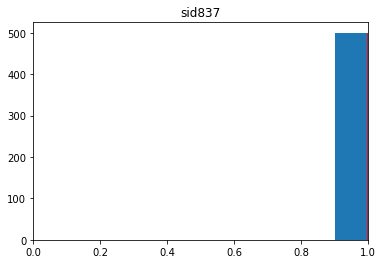

In [122]:
import matplotlib.pyplot as plt
sim_patient = np.empty([n_patients, n_sim]) 
for i in range(0, n_patients):
    true_obs = max(Data['Pobs'][i])
    
    for j in range(0,len(Data['Psim'][0])):
        #sim_patient[i,j] = max(Data['Psim'][i][j])
        sim_patient[i,j] = np.percentile(Data['Psim'][i][j], 98)
        
    plt.hist(sim_patient[i,:], bins = 5)
    plt.vlines(x=true_obs, ymin = 0, ymax = 500, colors = 'r')
    plt.xlim(0,1)
    plt.title(C['Index'][i])
    plt.show()
    


In [ ]:
#DOes it give similar predictions to sahar?
#User her weights for logistic.

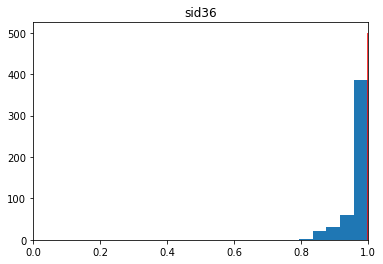

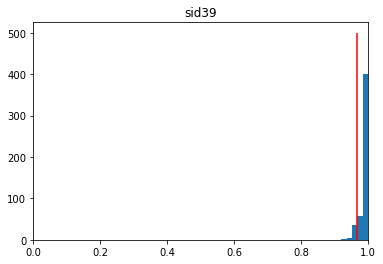

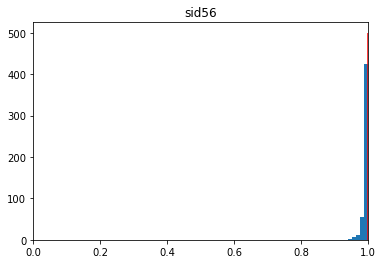

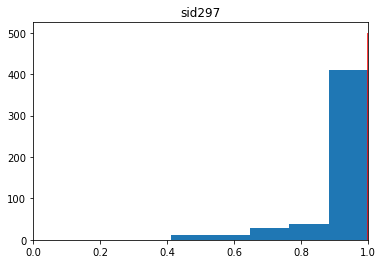

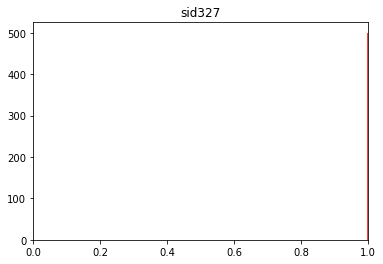

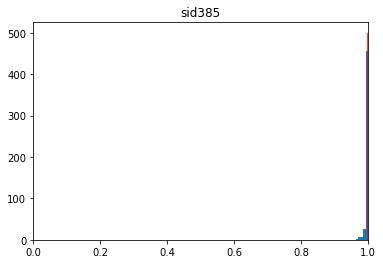

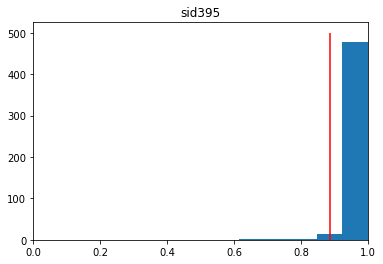

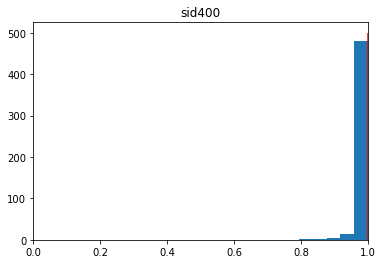

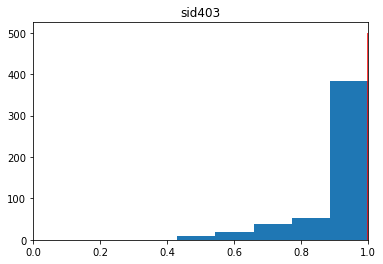

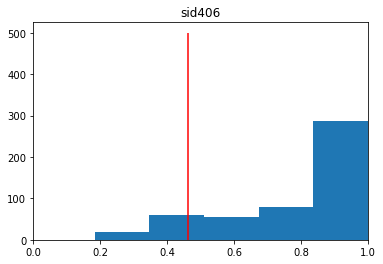

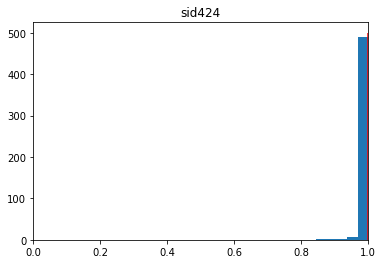

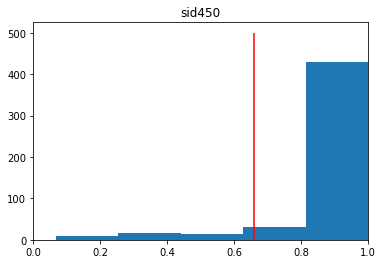

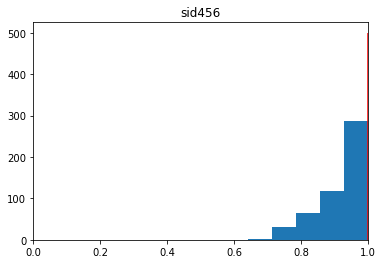

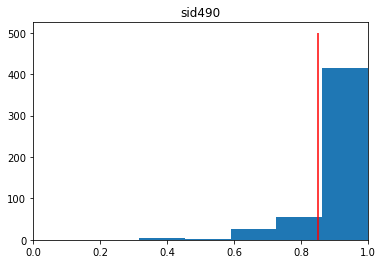

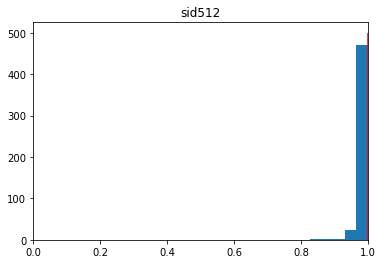

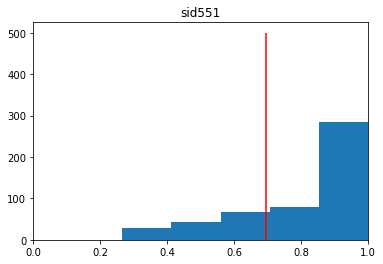

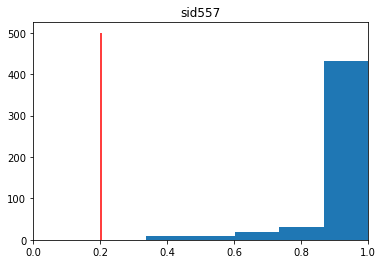

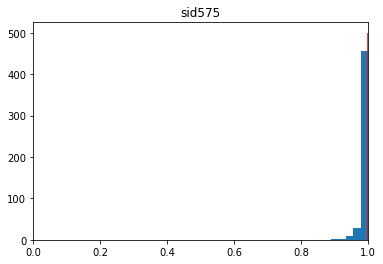

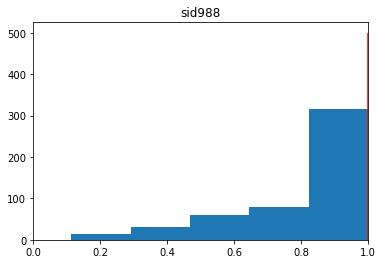

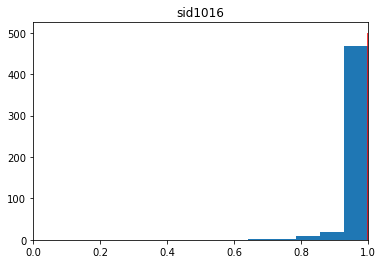

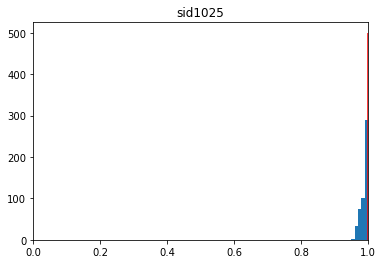

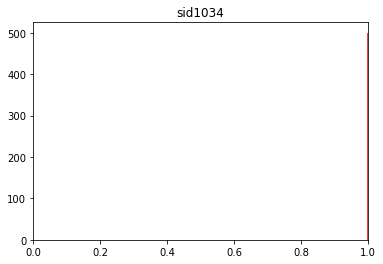

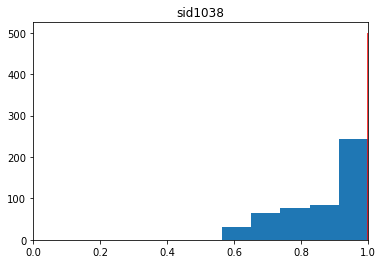

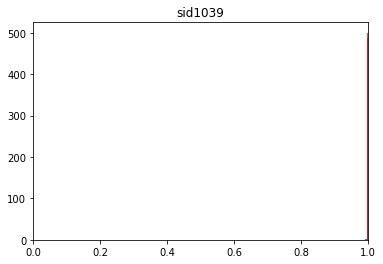

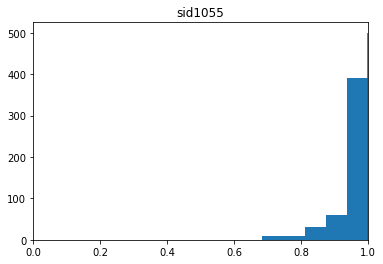

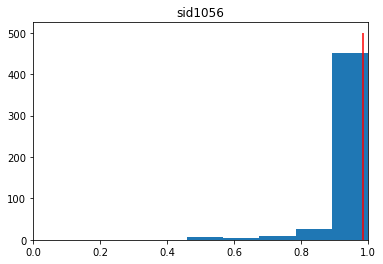

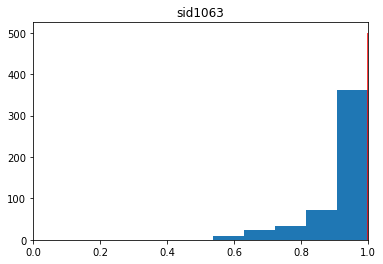

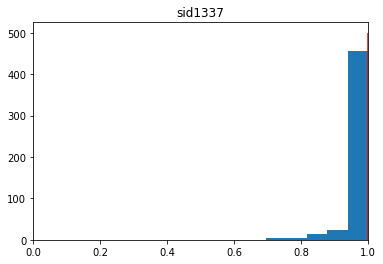

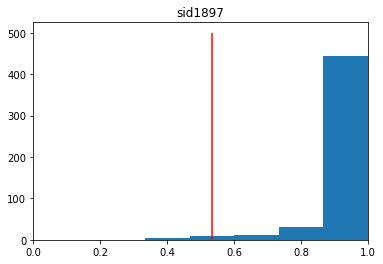

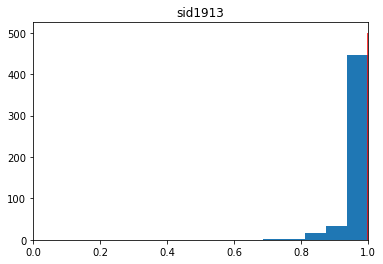

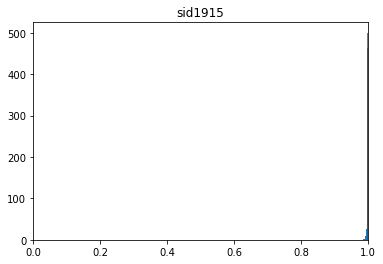

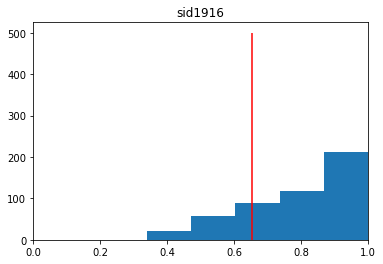

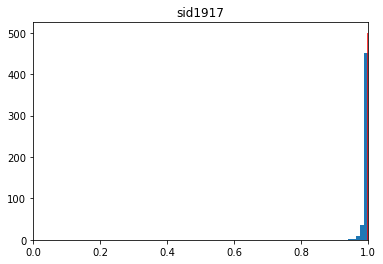

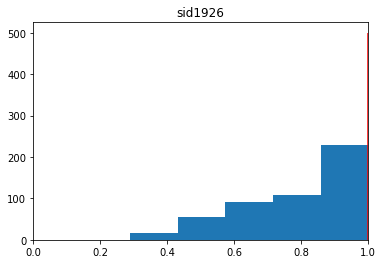

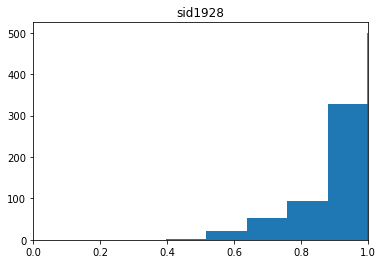

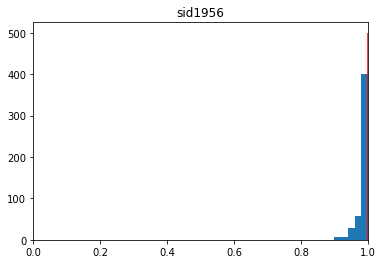

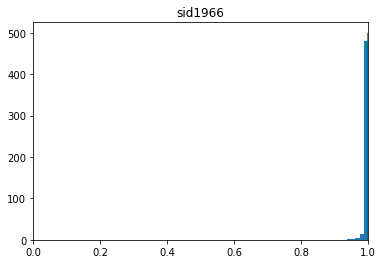

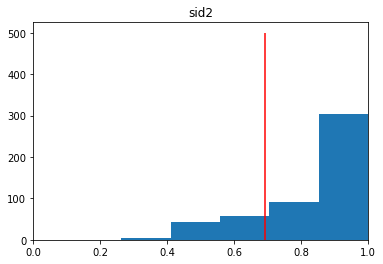

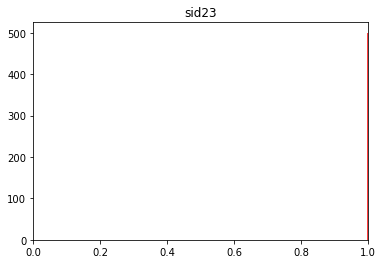

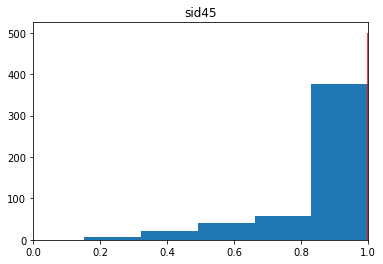

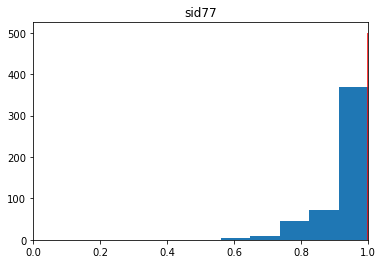

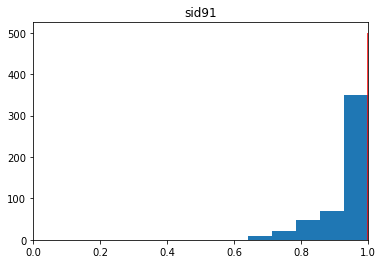

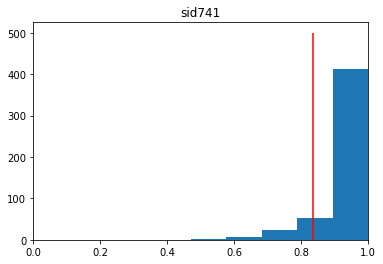

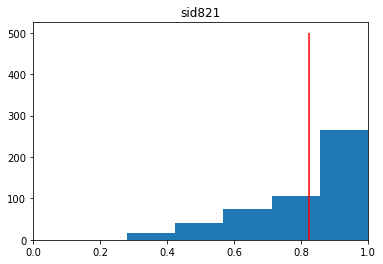

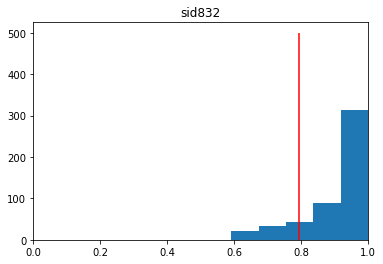

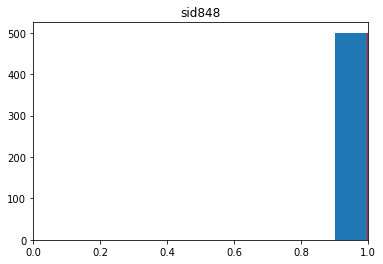

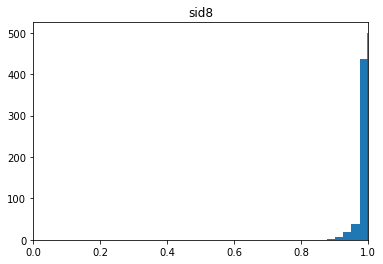

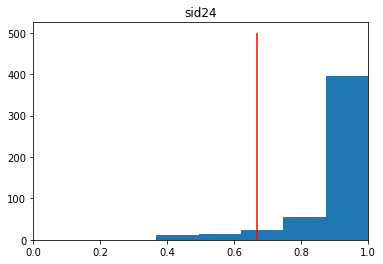

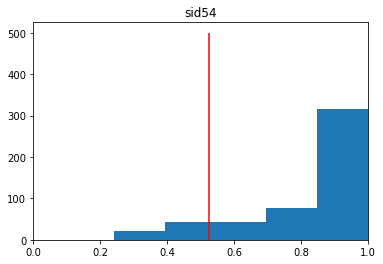

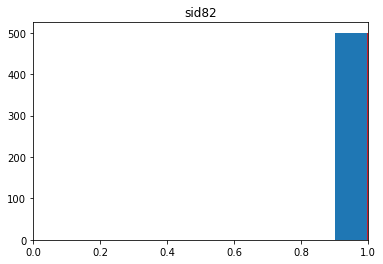

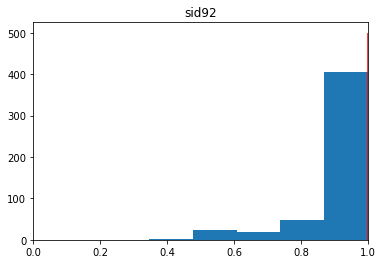

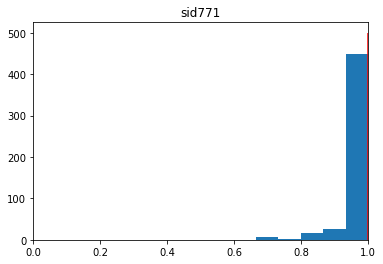

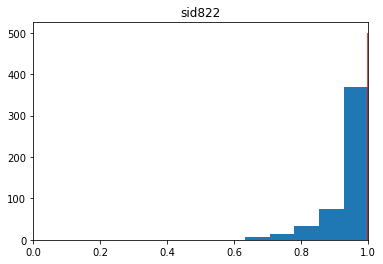

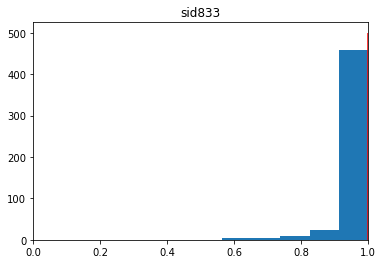

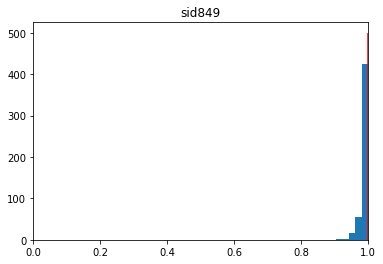

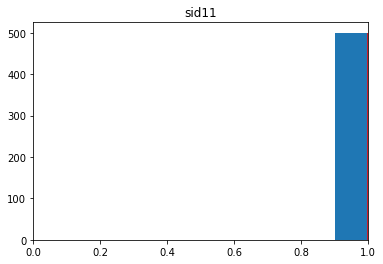

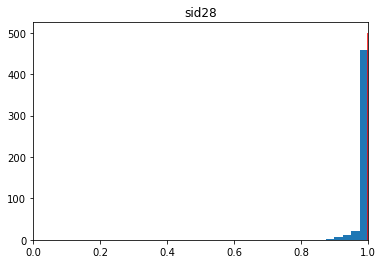

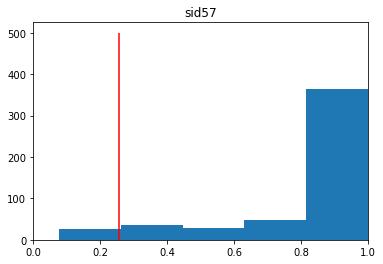

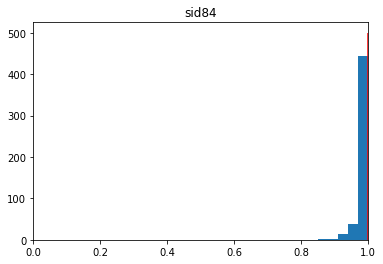

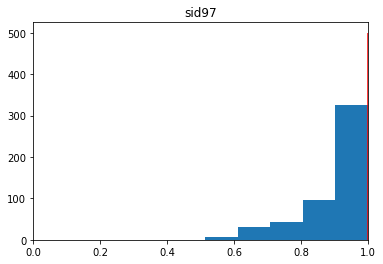

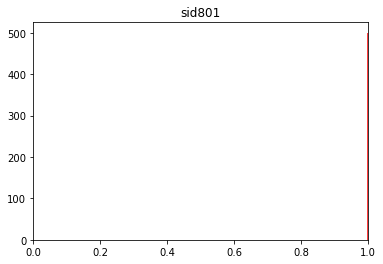

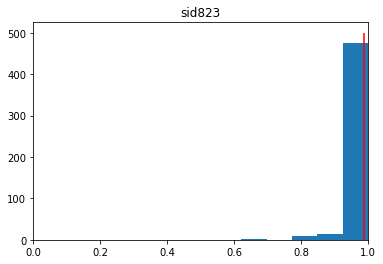

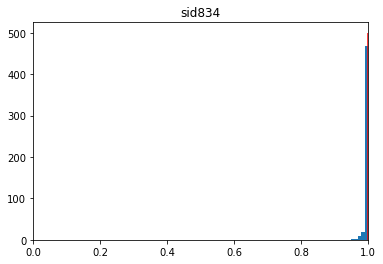

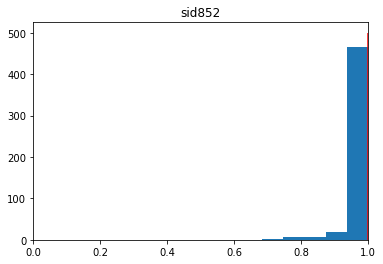

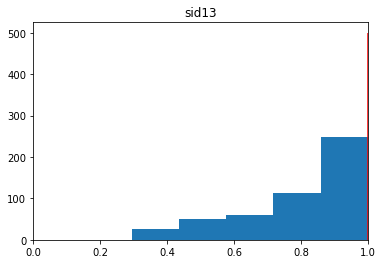

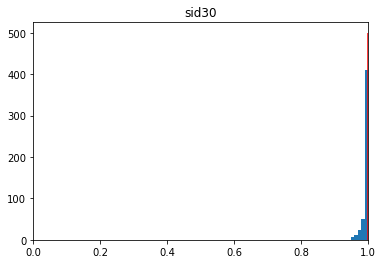

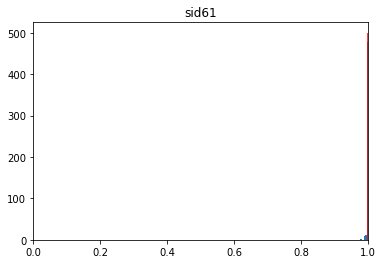

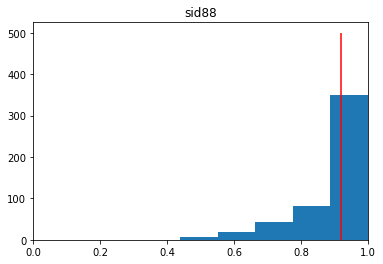

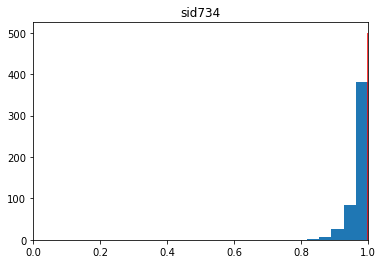

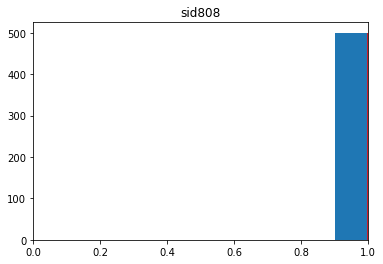

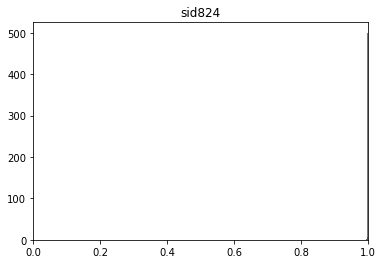

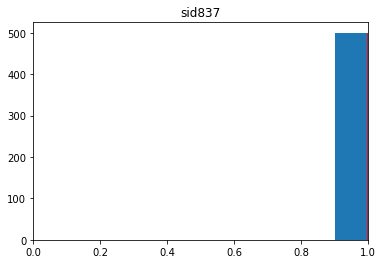

[[2.38073244e-03 7.40051298e-04 1.00529209e-04 1.83922781e-02
  1.35928889e-06 2.96735556e-05 1.17587564e-02 4.41614009e-04
  1.98999833e-02 1.62277191e-01 1.49947556e-04 1.03549026e-01
  1.14657950e-02 2.06772545e-02 3.09387449e-04 5.59907010e-02
  5.62919674e-01 2.09665031e-04 7.89187127e-02 1.87234418e-03
  2.42768711e-04 5.74862222e-07 3.22359734e-02 7.02888889e-07
  4.90341383e-03 6.72684800e-03 1.57530302e-02 2.10221664e-03
  1.89221733e-01 1.99681419e-03 2.29244444e-06 4.97955423e-02
  6.91523200e-05 7.35763758e-02 2.62452201e-02 4.53939556e-04
  3.57107556e-05 5.60164730e-02 1.96355556e-08 4.63629883e-02
  1.06774382e-02 9.52464285e-03 1.97515333e-02 3.30151554e-02
  2.44532384e-02 0.00000000e+00 3.97375396e-04 8.30560618e-02
  1.43061266e-01 0.00000000e+00 2.03853513e-02 2.86015815e-03
  7.69055556e-03 4.34413650e-03 2.53029156e-04 0.00000000e+00
  3.18128907e-04 3.97731906e-01 5.04256364e-04 1.90454991e-02
  1.11680000e-07 1.22585074e-03 3.71961689e-05 1.56099468e-03
  7.1248

In [121]:
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import itertools
sim_patient = np.empty([n_patients, n_sim]) 
true_obs = np.empty(n_patients)
rmse_mat = np.empty([1,n_patients])



for i in range(0, n_patients):
    true_obs[i] = max(Data['Pobs'][i])
    
    for j in range(0,len(Data['Psim'][0])):
        #sim_patient[i,j] = max(Data['Psim'][i][j])
        sim_patient[i,j] = np.percentile(Data['Psim'][i][j], 98)
        

    x = np.repeat(true_obs[i], n_sim)
    rmse_mat[0,i] = mean_squared_error( x  ,sim_patient[i,:])
    #rmse_mat[0,i] = np.sum(np.abs( x  -sim_patient[i,:]))/500
    
    
    
    plt.hist(sim_patient[i,:], bins = 5)
    plt.vlines(x=true_obs[i], ymin = 0, ymax = 500, colors = 'r')
    plt.xlim(0,1)
    plt.title(C['Index'][i])
    plt.show()
    
print(rmse_mat)
print(np.mean(rmse_mat))



In [ ]:
#Mean
# 95 = 0.055028405428963416
# 98 = 0.033657072433417624
# 99 = 0.03323946031585304
#100 = 0.03517318685445414

In [ ]:
#Median
# 95 = 0.13930008198195964
# 99 = 0.08034538422986398
# 100 =0.07782930608639257

In [ ]:
#If we really wanna game things we could find alpha = percentile for real data beta = percentile for simualted data. and see what value maximizes that. 